# Spotlight on Selenium and BeautifulSoup 

Name : Yunzhi Tang  
UIN:629008731 

# What is Web Scraping?

Web Scraping is a process to extract valuable information from websites and online contents. It is a free method to extract information and receive datasets for further analysis. In this era where information is practically highly related to each other, web scraping is an important tool to getting information and data.

# What is Selenium?

Selenium is a portable framework for testing web applications. Selenium provides a playback tool for authoring functional tests without the need to learn a test scripting language (Selenium IDE). It also provides a test domain-specific language (Selenese) to write tests in a number of popular programming languages, including C#, Groovy, Java, Perl, PHP, Python, Ruby and Scala. The tests can then run against most modern web browsers. Selenium runs on Windows, Linux, and macOS. It is open-source software released under the Apache License 2.0.

# What is BeautifulSoup?

Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.[1]

It is available for Python 2.7 and Python 3.

Beautiful Soup parses HTML into an easy machine readable tree format to extract DOM Elements quickly. It allows extraction of a certain paragraph and table elements with certain HTML ID/Class/XPATH.

# First Steps:

Pip install beautifulsoup4 and pip install requests. Requests would get the HTML element from URL

To demonstrate the power of beautifulsoup, I will use BS to web scrap the top 100 movie from wekipedia

In [1]:
import requests
from bs4 import BeautifulSoup
import codecs
import pandas as pd

In [2]:
url = "https://en.wikipedia.org/wiki/AFI%27s_100_Years...100_Movies_(10th_Anniversary_Edition)"
r = requests.get(url)

In [3]:
soup = BeautifulSoup(r.content, "html.parser")
table = soup.find_all('table')[1]
rows = table.find_all('tr')
row_list = list()

In [4]:
for tr in rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    row_list.append(row)

In [7]:
df = pd.DataFrame(row_list,columns=['Rank','movie name','director','year','studio','change from 1988'])
df.set_index('Rank',inplace=True)
df.to_csv('movie.csv')

After export the file into csv file, we can read it using pandas

In [11]:
df_movie = pd.read_csv('movie.csv')

In [12]:
df_movie.head(10)

,Rank,movie name,director,year,studio,change from 1988
0,1.0,Citizen Kane\n,Orson Welles\n,1941,RKO\n,\n
1,2.0,The Godfather\n,Francis Ford Coppola\n,1972,Paramount\n,1\n
2,3.0,Casablanca\n,Michael Curtiz\n,1942,Warner Brothers\n,1\n
3,4.0,Raging Bull\n,Martin Scorsese\n,1980,United Artists\n,20\n
4,5.0,Singin' in the Rain\n,"Gene Kelly, Stanley Donen\n",1952,Metro-Goldwyn-Mayer\n,5\n
5,6.0,Gone with the Wind\n,Victor Fleming\n,1939,"Metro-Goldwyn-Mayer (distributor), Selznick In...",2\n
6,7.0,Lawrence of Arabia\n,David Lean\n,1962,"Horizon, Columbia\n",2\n
7,8.0,Schindler's List\n,Steven Spielberg\n,1993,Universal\n,1\n
8,9.0,Vertigo\n,Alfred Hitchcock\n,1958,Paramount\n,52\n
9,10.0,The Wizard of Oz\n,Victor Fleming\n,1939,Metro-Goldwyn-Mayer\n,4\n


In [18]:
df_movie.describe()

,Rank,year
count,100.000000,100.000000
mean,50.500000,1962.620000
std,29.011492,20.013521
min,1.000000,1916.000000
25%,25.750000,1946.000000
50%,50.500000,1964.500000
75%,75.250000,1976.000000
max,100.000000,2001.000000


In [20]:
df_movie.size

600

Now we try to use the basic function of the tool of selenium

In [14]:
pip install selenium

  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [21]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
# browser = webdriver.Chrome()
# browser.get('http://www.google.com/')

The code below will show the process of using selenium to navigate to python.org page,find the id of search bar and fill in the key to search, then print out the page source html

open the browser and go to python.org

In [ ]:
driver = webdriver.Chrome()
driver.get("http://www.python.org")
assert "Python" in driver.title

First we inspect the source code and find that <input id="id-search-field" name="q" type="search" role="textbox" class="search-field" placeholder="Search" value="" tabindex="1">  
So we know the search field name is 'q'  
find the element by 'q'

In [ ]:
elem = driver.find_element_by_name("q")

Then fill the search field with keys I input

In [24]:
elem.send_keys("numpy")
elem.send_keys(Keys.RETURN)
# return and print the page source after the page load complete
print(driver.page_source)

<html class="js no-touch geolocation fontface generatedcontent svg formvalidation placeholder boxsizing no-retina" lang="en" dir="ltr" style=""><!--<![endif]--><head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" content="True">
    <meta name="format-detection" content="telephone=no">
    <meta http-equiv="cleartype" content="on">
    <meta http-equiv="imagetoolbar" content="false">

    <script

Now we will try combine selenium and beautifulsoup to do web scraping

We have already have the page source from selenium, now pass the page source to BS

Now we first print out top 30 news title/reference on the page

In [42]:
soup = BeautifulSoup(html,"html.parser")
for tag in soup.find_all('a',class_="storylink"):
    print(tag.text)
# print(soup.find_all("div", {"class": "storylink"}))
# for link in soup.find_all('li'):
#     print("{0}: {1}".format(link.name, link.text))

FCC will require phone carriers to authenticate calls by June 2021 [pdf]
Honda bucks industry trend by removing touchscreen controls
Vim rendered on a cube for no reason
Trolls break into meetings on Zoom
Planning and Managing Layoffs
I think Catalina 10.15.4 broke SSH
The Unreal Engine Wiki is now permanently offline
Apple acquires Dark Sky
Show HN: Xcnotary – a Mac app notarization helper made with Rust
How the Zoom macOS installer does its job without you clicking ‘install’
Show HN: Bungholio – Get text messages when a product is available on Amazon
How YC will be funding the S20 batch
Amazon struggles to find its coronavirus footing
Google emphasizes popularity over accuracy
Prisma 2.0 Beta: Type-safe Database Access
Signaling as a Service
Marriott says 5.2M guests exposed in new data breach
Malware masked as textbooks and essays
Industry spent millions selling recycling, to sell more plastic
A reduction in seismic noise is a boon for geoscientists
Grupeer Suspends Payments to Inve

In [43]:
print(len(soup.find_all('a',class_="storylink")))

30


Now we want to print all the content in this 30 title/news

<html><head></head><body style="height: 100%; width: 100%; overflow: hidden; margin:0px; background-color: rgb(82, 86, 89);"><embed style="position:absolute; left: 0; top: 0;" width="100%" height="100%" src="about:blank" type="application/pdf" internalid="EDD85934D2C9CE5C501882EF26F03AE4"></body></html>
<html lang="en" dir="ltr" prefix="og: http://ogp.me/ns#" class="js"><!--<![endif]--><head>
  <!--[if IE]><![endif]-->
<meta charset="utf-8">
<link rel="shortcut icon" href="https://www.autocar.co.uk/sites/autocar.co.uk/themes/custom/autocar/favicon.ico" type="image/vnd.microsoft.icon">
<script src="https://quantcast.mgr.consensu.org/cmp.js" async="" type="text/javascript"></script><script async="" src="//widgets.getsitecontrol.com/139774/script.js"></script><script type="text/javascript" async="" src="https://static.hotjar.com/c/hotjar-95167.js?sv=7"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascrip

<html lang="en"><head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-FG+rXqMOivrAjdEQE7tO4BwM1poGmg70hJFTlNSxjX87grtrZ6UnPR8NkzwUHlQEGviu9XuRYeO8zH9YwvZhdg==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-146fab5ea30e8afac08dd11013bb4ee0.css">
  <link crossorigin="anonymous" media="all" integrity="sha512-iXrV/b4ypc1nr10b3Giikqff+qAx5osQ0yJRxHRDd8mKFefdMtEZ0Sxs1QysJxuJBayOKThjsuMjynwBJQq0aw==" rel="stylesheet" 

<html class="fonts-loaded"><head><style type="text/css">a.fl_flip_button,a.fl_profile_button{color:#474747;text-decoration:none;display:inline-block;line-height:18px;font-family:'Helvetica Neue',Helvetica,sans-serif;font-size:12px;font-weight:500;text-indent:19px;position:relative;padding-right:5px;background-color:#f0f0f0;border:solid 1px #ccc;height:18px;box-sizing:content-box;-webkit-border-radius:3px;-moz-border-radius:3px;border-radius:3px;background-image:-webkit-linear-gradient(bottom,#dfdfdf,#f7f7f7);background-image:-moz-linear-gradient(bottom,#dfdfdf,#f7f7f7);background-image:-o-linear-gradient(bottom,#dfdfdf,#f7f7f7);background-image:linear-gradient(to top,#dfdfdf,#f7f7f7)}a.fl_flip_button b,a.fl_profile_button b{background:url() no-repeat;background-size:12px 12px;height:12px;width:12px;position:absolute;top:3px;left:3px}a.fl_flip_button:hover,a.fl_profile_button:hover{border-color:#bfbfbf}a.fl_flip_button:active,a.fl_profile_button:active{border:solid 1px #bfbfbf;backgroun
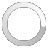

<html lang="en-US" style="" class=" async-hide"><head><script type="text/javascript" async="" src="//munchkin.marketo.net/158/munchkin.js"></script><script async="" src="https://pages.a16z.com/index.php/form/getForm?munchkinId=172-QER-842&amp;form=505&amp;url=https%3A%2F%2Fa16z.com%2F2020%2F03%2F31%2Fplanning-and-managing-layoffs%2F&amp;callback=jQuery112407776728910157449_1585708548314&amp;_=1585708548320"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/gtm/js?id=GTM-WS5QVMJ&amp;t=gtm1&amp;cid=1000260791.1585708549"></script><script src="https://srv-2020-04-01-02.config.parsely.com/config/a16z.com"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" src="https://pages.a16z.com/index.php/form/getForm?munchkinId=172-QER-842&amp;form=676&amp;url=https%3A%2F%2Fa16z.com%2F2020%2F03%2F31%2Fplanning-and-managing-layoffs%2F&amp;callback=jQuery112407776728910157449_1585708548318&am

<html class="no-js" lang="en-US" id="arve"><head>
<title>So, uh, I think Catalina 10.15.4 Broke SSH? – tyler.io</title>

<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<link rel="profile" href="https://gmpg.org/xfn/11">
<link rel="pingback" href="https://feed.tyler.io/xmlrpc.php">
<link rel="dns-prefetch" href="//cdn.tyler.io">
<link rel="dns-prefetch" href="//fonts.googleapis.com">
<link rel="dns-prefetch" href="//stats.clickontyler.com">
<link rel="me" href="https://twitter.com/tylerhall">
<link rel="me" href="https://github.com/tylerhall">
<link rel="me" href="https://www.linkedin.com/in/tylerhall">
<link rel="me" href="mailto:rth@tyler.io">
<link rel="webmention" href="https://webmention.io/tyler.io/webmention">
<link rel="pingback" href="https://webmention.io/tyler.io/xmlrpc">
<meta http-equiv="Content-Security-Policy" content="
		                        default-src * data: blob:;
		                        style-src * 'unsafe-inline';

<html lang="en"><head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-FG+rXqMOivrAjdEQE7tO4BwM1poGmg70hJFTlNSxjX87grtrZ6UnPR8NkzwUHlQEGviu9XuRYeO8zH9YwvZhdg==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-146fab5ea30e8afac08dd11013bb4ee0.css">
  <link crossorigin="anonymous" media="all" integrity="sha512-iXrV/b4ypc1nr10b3Giikqff+qAx5osQ0yJRxHRDd8mKFefdMtEZ0Sxs1QysJxuJBayOKThjsuMjynwBJQq0aw==" rel="stylesheet" 

<html dir="ltr" lang="zh"><head><meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover">
<link rel="preconnect" href="//abs.twimg.com">
<link rel="preconnect" href="//api.twitter.com">
<link rel="preconnect" href="//pbs.twimg.com">
<link rel="preconnect" href="//t.co">
<link rel="preconnect" href="//video.twimg.com">
<link rel="dns-prefetch" href="//abs.twimg.com">
<link rel="dns-prefetch" href="//api.twitter.com">
<link rel="dns-prefetch" href="//pbs.twimg.com">
<link rel="dns-prefetch" href="//t.co">
<link rel="dns-prefetch" href="//video.twimg.com">
<link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/web/polyfills.157eef94.js" nonce="">
<link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/web/vendors~main.483e4ab4.js" nonce="">
<link rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.c

<html lang="en"><head>
  <meta charset="utf-8">

  <title>Dark Sky Has a New Home</title>
  <meta content="width=device-width, initial-scale=1" name="viewport">
  <meta name="description" content="Today we have some important and exciting news to share: Dark Sky has joined Apple.">

  <meta name="twitter:card" content="summary">
  <meta name="twitter:site" content="@DarkSkyApp">
  <meta name="twitter:title" content="Dark Sky Has a New Home">
  <meta name="twitter:description" content="Blog of the best weather app and weather API in the world: Dark Sky
">
  <meta name="twitter:url" content="https://blog.darksky.net/dark-sky-has-a-new-home/">
  
  
  <meta name="twitter:creator" content="@thegrossman">
  
  
  <meta name="twitter:image:src" content="https://blog.darksky.net/wp-content/uploads/2016/09/dsn-header-1920x768.jpg">
  

  <link rel="stylesheet" href="/assets/main.css?1585674732679914752">
  <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Lato:100,300,400,70

<html id="htmlTag" xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en" dir="ltr" style="" class=" cookies history filereader hashchange cssgradients multiplebgs opacity csspointerevents cssremunit rgba fileinput placeholder supports hsla mediaqueries fontface generatedcontent lastchild cssscrollbar subpixelfont formvalidation textshadow cssanimations backgroundsize borderimage borderradius boxshadow boxsizing csscolumns csscolumns-width csscolumns-span csscolumns-fill csscolumns-gap csscolumns-rule csscolumns-rulecolor csscolumns-rulestyle csscolumns-rulewidth csscolumns-breakbefore csscolumns-breakafter csscolumns-breakinside cssfilters flexbox no-overflowscrolling cssreflections cssresize csstransforms csstransforms3d csstransitions no-firefox no-opera"><head><script type="text/javascript" src="https://bam.nr-data.net/1/93a8bd5691?a=36976574&amp;v=1167.2a4546b&amp;to=MlxXbUBZWkJUAkVQCgsWYEtbF11fUQRJFxUNSQ%3D%3D&amp;rst=2573&amp;ref=https://forums.unrealengine.com/unreal-engi

<html><head>
        <meta charset="utf-8">
        <meta name="norton-safeweb-site-verification" content="24usqpep0ejc5w6hod3dulxwciwp0djs6c6ufp96av3t4whuxovj72wfkdjxu82yacb7430qjm8adbd5ezlt4592dq4zrvadcn9j9n-0btgdzpiojfzno16-fnsnu7xd">
        <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0">
        <meta name="author" content="Dalton Caldwell">
        <link rel="canonical" href="https://dalton.substack.com/p/how-yc-will-be-funding-the-s20-batch">

        

        
            
                <link rel="shortcut icon" href="https://bucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com/public/images/1c31beb1-132e-4b36-8b95-2c325b5e79d3/favicon.ico">
            
        
            
                <link rel="icon" type="image/png" sizes="16x16" href="https://bucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com/public/images/1c31beb1-132e-4b36-8b95-2c325b5e79d3/favicon-16x16.png">
            
        
   

<html itemscope="" itemtype="http://schema.org/WebPage" xmlns="http://www.w3.org/1999/xhtml" lang="en-US" data-env="prod" data-site="wsj" data-region="na,us" data-protocol="https" data-layouttype="article" class=" font-swap font-fallback font-optional"><script src="https://js-agent.newrelic.com/nr-spa-1167.min.js"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_2020032302.js"></script><script src="https://pagead2.googlesyndication.com/pagead/show_companion_ad.js"></script><script src="https://asset.barrons.com/article/public/snippet.31c42bf71608db60478b.js" defer=""></script><script src="https://assets.vidora.com/js/vidora-client.1.2.9.min.js" defer=""></script><head>

    <title>Amazon Struggles to Find Its Coronavirus Footing. ‘It’s a Time of Great Stress.’ - WSJ</title>
    <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=2.0">
    <meta http-equiv="Content-Type" content="text/html; charset=
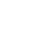
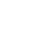
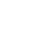

<html><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><style data-href="https://5e83f8498f3f1fe569edf591--prisma-blog.netlify.com/blog-assets/styles.12aa72f8c5f6778c4afe.css">code[class*=language-],pre[class*=language-]{color:#000;background:none;text-shadow:0 1px #fff;font-family:Consolas,Monaco,Andale Mono,Ubuntu Mono,monospace;text-align:left;white-space:pre;word-spacing:normal;word-break:normal;word-wrap:normal;line-height:1.5;-moz-tab-size:4;-o-tab-size:4;tab-size:4;-webkit-hyphens:none;-ms-hyphens:none;hyphens:none}code[class*=language-]::selection,code[class*=language-] ::selection,pre[class*=language-]::selection,pre[class*=language-] ::selection{text-shadow:none;background:#b3d4fc}@media print{code[class*=language-],pre[class*=language-]{text-shadow:none}}pre[class*=language-]{padding:1em;margin:.5em 0;overflow:auto}:not(pre)>code[class*=language-],pre[class*=

<html xmlns:umbraco="http://umbraco.org" xmlns="http://www.w3.org/1999/xhtml"><head><script async="" src="https://cdn.blueconic.net/gulfenergy.js"></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script type="text/javascript" src="https://pi.pardot.com/pd.js"></script><script async="" src="//www.googletagmanager.com/gtm.js?id=GTM-NQLSPT"></script><script async="" src="https://s7.addthis.com/js/300/addthis_widget.js"></script><script async="" src="https://securepubads.g.doubleclick.net/tag/js/gpt.js"></script><style type="text/css">[uib-typeahead-popup].dropdown-menu{display:block;}</style><style type="text/css">.uib-time input{width:50px;}</style><style type="text/css">[uib-tooltip-popup].tooltip.top-left > .tooltip-arrow,[uib-tooltip-popup].tooltip.top-right > .tooltip-arrow,[uib-tooltip-popup].tooltip.bottom-left > .tooltip-arrow,[uib-tooltip-popup].tooltip.bottom-right > .tooltip-arrow,[uib-tooltip-popup].tooltip.left-top > .tooltip-arrow,[uib

<html xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml" lang="en-US" class="yui3-js-enabled js flexbox canvas canvastext webgl no-touch hashchange history draganddrop rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms no-csstransforms3d csstransitions video audio svg inlinesvg svgclippaths wf-unibody8new-n4-active wf-yorktenslabextended-n7-active wf-yorktenslabextended-i7-active wf-unibody8new-n7-active wf-minionprodisplay-i4-active wf-video-n7-active wf-unibody8new-i4-active wf-yorktenslabextended-i4-active wf-video-n4-active wf-minervamodern-i7-active wf-yorktenslabextended-n4-active wf-minervamodern-n7-active wf-freightneopro-n4-active wf-minervamodern-n4-active wf-minervamodern-i4-active wf-active" style=""><div id="yui3-css-stamp" style="position: absolute !important; visibility: hidden !important"></div><head>
    <meta http-equiv="

<html lang="en"><head>
	<meta charset="utf-8">
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<meta name="viewport" content="width=device-width, initial-scale=1">
	<meta name="description" content="julian.digital weblog">
	<meta name="author" content="Julian Lehr">
	<title>Signaling as a Service «  julian.digital</title>
	<link href="//fonts.googleapis.com/css?family=Roboto+Mono:400,400i,700" rel="stylesheet">
	<link href="//fonts.googleapis.com/css?family=Roboto:700" rel="stylesheet">
	<link href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0-alpha.6/css/bootstrap.min.css" integrity="sha384-rwoIResjU2yc3z8GV/NPeZWAv56rSmLldC3R/AZzGRnGxQQKnKkoFVhFQhNUwEyJ" rel="stylesheet" crossorigin="anonymous">
	<link href="https://julian.digital/wp-content/themes/digital2/css/bootstrap.css" rel="stylesheet">
	<link href="https://julian.digital/wp-content/themes/digital2/css/blog.css" rel="stylesheet">
	<link rel="pingback" href="https://julian.digital/xmlrpc.php">
	<!-- HTML5 shim and Re

<html lang="en-US" class="no-js" style="box-sizing : border-box;"><head style=""><script src="https://connect.facebook.net/en_US/all.js?hash=8c0b4225f4752068b6185b00eaa54363&amp;ua=modern_es6" async="" crossorigin="anonymous"></script><script async="" src="https://www.linkedin.com/countserv/count/share?url=https%3A%2F%2Fwww.kaspersky.com%2Fblog%2Fback-to-school-malware-2019%2F28316%2F&amp;format=jsonp&amp;callback=jQuery1124016688138394909235_1585708577173&amp;_=1585708577174"></script>
	<meta charset="UTF-8">
	<meta name="viewport" content="width=device-width, initial-scale=1">
	<link rel="profile" href="http://gmpg.org/xfn/11">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge">
	<title>How to avoid downloading an infected textbook or essay | Kaspersky official blog</title>

<!-- Start The SEO Framework by Sybre Waaijer -->
<meta name="keywords" content="antivirus, antivirus software, internet security, essay, textbook, malware, trojan, downloaders, worms, not-a-virus:HEUR:Downloa

<html lang="en" data-edition="BETAUS" class=""><head>

    <title>
                Marriott says 5.2 million guests exposed in new data breach - Reuters</title>
        <meta http-equiv="X-UA-Compatible" content="IE=edge"><meta charset="utf-8"><meta http-equiv="x-dns-prefetch-control" content="on"><link rel="dns-prefetch" href="//s1.reutersmedia.net"><link rel="dns-prefetch" href="//s2.reutersmedia.net"><link rel="dns-prefetch" href="//s3.reutersmedia.net"><link rel="dns-prefetch" href="//s4.reutersmedia.net"><link rel="dns-prefetch" href="//static.reuters.com"><link rel="dns-prefetch" href="//www.googletagservices.com"><link rel="dns-prefetch" href="//www.googletagmanager.com"><link rel="dns-prefetch" href="//www.google-analytics.com"><link rel="dns-prefetch" href="//static.chartbeat.com"><meta name="robots" content="index, follow">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=yes">

    <!-- Segment -->
    <script type="text/javascript" async
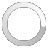

<html lang="en-GB"><head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<link rel="profile" href="https://gmpg.org/xfn/11">
<link rel="pingback" href="https://blog.grupeer.com/xmlrpc.php">
<title>Statement from Grupeer - Grupeer Blog</title>

<meta name="description" content="Statement from Alla Kisika - Grupeer CEO on the current situation">
<link rel="canonical" href="https://www.grupeer.com/blog/statement-from-grupeer/">
<meta property="og:locale" content="en_GB">
<meta property="og:type" content="article">
<meta property="og:title" content="Statement from Grupeer - Grupeer Blog">
<meta property="og:description" content="Statement from Alla Kisika - Grupeer CEO on the current situation">
<meta property="og:url" content="https://www.grupeer.com/blog/statement-from-grupeer/">
<meta property="og:site_name" content="Grupeer Blog">
<meta property="article:section" content="Investment">
<me

<html class="js no-touch csstransforms3d video audio" lang="en" style=""><head><script>
   try {var _sf_startpt=(new Date()).getTime();} catch(e){}
</script>
<meta itemscope="" itemtype="https://schema.org/SpeakableSpecification" itemref="speakable"><title>Plastics Industry Promoted Recycling To Help Keep Oil And Gas Profits High : NPR</title><meta id="speakable" itemprop="cssSelector" content="[data-is-speakable]"><meta id="google-site-verification" name="google-site-verification" content="1VqzbDm4ukeFVHOoq5LjIKA2fVKZD-EYv8cXZhKXSfU"><meta charset="utf-8"><meta name="robots" content="noarchive,index,follow"><meta name="Rating" content="General"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name="npr-pjax"><meta name="date" content="2020-03-31"><link rel="canonical" href="https://www.npr.org/2020/03/31/822597631/plastic-wars-three-takeaways-from-the-fight-over-the-future-of-plastics"><meta name="description" content="An investigation from N

<html itemscope="" itemtype="http://schema.org/Article" class=""><head><script type="text/javascript" async="" src="//aax-us-east.amazon-adsystem.com/x/getad?src=330&amp;c=100&amp;sz=1x1&amp;apiVersion=2.0&amp;pj=%7B%22overwrite%22%3A%22false%22%2C%22div_name%22%3A%22amzn-assoc-ad-f545cb86-96ab-4c6e-a754-41f45d8a2104%22%2C%22tracking_id%22%3A%22drive09e6-20%22%2C%22ad_type%22%3A%22one_tag%22%2C%22marketplace%22%3A%22amazon%22%2C%22enable_geo_redirection%22%3A%22true%22%2C%22enable_auto_tagging%22%3A%22false%22%2C%22region%22%3A%22US%22%2C%22placement%22%3A%22adunit%22%2C%22viewerCountry%22%3A%22US%22%2C%22textlinks%22%3A%22%22%2C%22debug%22%3A%22false%22%2C%22acap_publisherId%22%3A%22drive09e6-20%22%2C%22slotNum%22%3A0%7D&amp;u=https%3A%2F%2Fwww.thedrive.com%2Fthe-war-zone%2F32807%2Fexclusive-unmasking-northrop-grummans-xrq-72a-great-horned-owl-spy-drone&amp;jscb=amzn_assoc_jsonp_callback_adunit_0" charset="UTF-8"></script><script src="https://sdk.amazonaws.com/js/aws-sdk-2.518.0.min.j

<html lang="en" class="js svg"><head>
    <meta charset="utf-8">
<link rel="dns-prefetch" href="//ajax.googleapis.com">
<link rel="dns-prefetch" href="//fonts.googleapis.com">
<link rel="dns-prefetch" href="//fonts.gstatic.com">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no">

    <title>Coronavirus lockdowns have changed the way Earth moves</title>
    <meta name="description" content="A reduction in seismic noise because of changes in human activity is a boon for geoscientists.">
    <meta property="og:url" content="https://www.nature.com/articles/d41586-020-00965-x">
    <meta property="og:type" content="article">
    <meta property="og:title" content="Coronavirus lockdowns have changed the way Earth moves">
    <meta property="og:description" content="A reduction in seismic noise because of changes in human activity is a boon for geoscientists.">
    <meta property="og:image" content="htt

<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#" data-page-top="gallery"><head><script src="https://agility.cnn.com/turner/cnn-prod/serverComponent.php?r=6688729.302214389&amp;ClientID=1511&amp;PageID=https%3A%2F%2Fedition.cnn.com%2Fstyle%2Farticle%2Fmid-century-memories-kodachrome%2Findex.html"></script><script src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="//cdn.adsafeprotected.com/iasPET.1.js"></script><script type="text/javascript" async="" src="//www.ugdturner.com/xd.sjs"></script><script type="text/javascript" async="" src="https://cdn.cnn.com/ads/adfuel/modules/keypress.js"></script><script async="" src="//c.amazon-adsystem.com/aax2/apstag.js"></script><script type="text/javascript" async="" src="//www.i.cdn.cnn.com/zion/zion-mb.min.js"></script><script type="text/javascript" async="" src="//cdn3.optimizely.com/js/geo2.js"></script><meta http-equiv="x-ua-compatible" content="ie=edge"><titl

ProtocolError: ('Connection aborted.', ConnectionResetError(10054, '远程主机强迫关闭了一个现有的连接。', None, 10054, None))

In [56]:
driver = webdriver.Chrome()
driver.get("http://news.ycombinator.com")
html = driver.page_source
soup = BeautifulSoup(html,"html.parser")
for tag in soup.find_all('a',class_="storylink"):
    driver.get("http://news.ycombinator.com")
    python_button = driver.find_elements_by_link_text(tag.text)[0]
    python_button.click()
    print(driver.page_source)
#     driver.implicitly_wait(5)
#     driver.back()

We can actually seperate those content into text files

In [88]:
driver = webdriver.Chrome()
driver.get("http://news.ycombinator.com")
html = driver.page_source
soup = BeautifulSoup(html,"html.parser")
for tag in soup.find_all('a',class_="storylink"):
    file_name = tag.text[0:10] + ".txt"
    driver.get("http://news.ycombinator.com")
    python_button = driver.find_elements_by_link_text(tag.text)[0]
    python_button.click()
    pg = driver.page_source
    s = BeautifulSoup(pg,"html.parser")
    f = open(file_name, 'w',encoding='utf-8')
    f.write(str(s.prettify()))
    f.close()
#     print(s)
#     try:
#         file = open(file_name + ".txt","w") 
#         file.wrtie(driver.page_source)
#         file.close
#     except Exception as e:
#    # get line number and error message
#         with open(file_name, 'w') as f:
#             f.write('an error occurred')
#     print(driver.page_source)

After its running complete, we have 30 text files contains the basic source page news to analyse

Eg. Open Oil sellin.txt

In [95]:
file = open("Oilsellin.txt","r",encoding='utf-8') 
print(file.readlines())
# print(all_lines)
file.close

['<html xmlns="http://www.w3.org/1999/xhtml" xmlns:umbraco="http://umbraco.org">\n', ' <head>\n', '  <script async="" src="https://cdn.blueconic.net/gulfenergy.js">\n', '  </script>\n', '  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">\n', '  </script>\n', '  <script src="https://pi.pardot.com/pd.js" type="text/javascript">\n', '  </script>\n', '  <script async="" src="//www.googletagmanager.com/gtm.js?id=GTM-NQLSPT">\n', '  </script>\n', '  <script async="" src="https://cdn.onesignal.com/sdks/OneSignalSDK.js">\n', '  </script>\n', '  <script async="" src="https://s7.addthis.com/js/300/addthis_widget.js">\n', '  </script>\n', '  <style type="text/css">\n', '   [uib-typeahead-popup].dropdown-menu{display:block;}\n', '  </style>\n', '  <style type="text/css">\n', '   .uib-time input{width:50px;}\n', '  </style>\n', '  <style type="text/css">\n', '   [uib-tooltip-popup].tooltip.top-left > .tooltip-arrow,[uib-tooltip-popup].tooltip.top-right > .tooltip-arrow,[uib-to

<function TextIOWrapper.close()>

# Conclusion:

selenium as a automate tool can easily help us with web scrapping and with the help of beautifulsoup, we can even better get our desired content and use those data to analyse